In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Define a custom formatter
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k' if x != 0 else 0

# Get table of best results using idmax for all ABoxes

ABox u1:

In [ ]:
df = pd.read_csv('u1_results.csv', sep=';')

In [ ]:
inc = {"University0_p_0.000005.db":0.01, "University0_p_0.000006.db": 0.0157, "University0_p_0.00001.db":0.0403, "University0_p_0.00005.db": 0.1372, "University0_p_0.00015.db":0.3765, "University0_p_0.0005.db":1.0998}
df["Inc %"] = [inc[x] for x in df['ABOX']]

In [ ]:
idx =  df.groupby('ABOX')["cpi_repair++_size"].idxmax()
agg_df = df.loc[idx]

In [ ]:
agg_df = agg_df.drop(index=44)

In [ ]:
best_result = agg_df[['Inc %', 'pi_repair_size', 'pi_repair_total_time', 'cpi_repair++_size', 'cpi_repair_total_time', 'cpi_repair++_total_time']]

ABox u5:

In [ ]:
df = pd.read_csv('u5_results.csv', sep=';')

In [ ]:
inc = {"University5_p_0.000005.db":0.0097 , "University5_p_0.00001.db": 0.0180, "University5_p_0.00005.db":0.1230, "University5_p_0.0001.db": 0.2621, "University5_p_0.0005.db":1.1665}

df["Inc %"] = [inc[x] for x in df['ABOX']]

In [ ]:
idx =  df.groupby('ABOX')["cpi_repair++_size"].idxmax()
agg_df = df.loc[idx]

In [ ]:
best_result = agg_df[['Inc %', 'pi_repair_size', 'pi_repair_total_time', 'cpi_repair++_size', 'cpi_repair_total_time', 'cpi_repair++_total_time']]

ABox u.5

In [ ]:
df = pd.read_csv('u0.5_results.csv', sep=';')

In [ ]:
inc = {"university0.5_p_0.000005.db":0.0121 , "university0.5_p_0.00001.db": 0.0423, "university0.5_p_0.00005.db":0.1379, "university0.5_p_0.0005.db": 0.3654, "university0.5_p_0.001.db":0.8249}

df["Inc %"] = [inc[x] for x in df['ABOX']]

In [ ]:
idx =  df.groupby('ABOX')["cpi_repair++_size"].idxmax()
agg_df = df.loc[idx]

In [ ]:
best_result = agg_df[['Inc %', 'pi_repair_size', 'pi_repair_total_time', 'cpi_repair++_size', 'cpi_repair_total_time', 'cpi_repair++_total_time']]

In [ ]:
best_result

,Inc %,pi_repair_size,pi_repair_total_time,cpi_repair++_size,cpi_repair_total_time,cpi_repair++_total_time
14,0.0121,8078,1.241,22740,27.649,11.264
35,0.0423,5344,1.332,15859,30.561,18.153
154,0.1379,742,1.279,2473,30.152,30.855
87,0.3654,1102,1.413,3651,30.750,29.349
133,0.8249,442,1.567,1475,28.827,28.651


# Evolution of time and size vs. inconsistency ratio

In [ ]:
# Step 1: Load the CSV file
df = pd.read_csv('u1_results.csv', sep=';')
#df = pd.read_csv('u5_results.csv', sep=';')

In [ ]:
# add column "Inc %" to dataframe
inc = {"University0_p_0.000005.db":0.01, "University0_p_0.000006.db": 0.0157, "University0_p_0.00001.db":0.0403, "University0_p_0.00005.db": 0.1372, "University0_p_0.00015.db":0.3765, "University0_p_0.0005.db":1.0998}

#inc = {"University5_p_0.000005.db":0.0097 , "University5_p_0.00001.db": 0.0180, "University5_p_0.00005.db":0.1230, "University5_p_0.0001.db": 0.2621, "University5_p_0.0005.db":1.1665}

df["Inc %"] = [inc[x] for x in df['ABOX']]


In [ ]:
idx =  df.groupby('ABOX')["cpi_repair++_size"].idxmax()

In [ ]:
agg_df = df.loc[idx]

In [ ]:
# Step 2: Aggregate duplicate ABOX entries by taking the average
# aggregated_df = df.groupby('ABOX').mean().reset_index()

In [ ]:
#aggregated_df.head(6)

In [ ]:
persent = {"University0_p_0.000005.db":"1%", "University0_p_0.000006.db": "1.57%", "University0_p_0.00001.db":"4.03%", "University0_p_0.00005.db": "13.72%", "University0_p_0.00015.db":"37.65%", "University0_p_0.0005.db":"109.98%"}

#persent = {"University5_p_0.000005.db":"0.97%" , "University5_p_0.00001.db": "1.80%", "University5_p_0.00005.db": "12.30%", "University5_p_0.0001.db": "26.21%", "University5_p_0.0005.db":"116.65%"}

agg_df["Inc%"] = [persent[x] for x in agg_df['ABOX']]

In [ ]:
agg_df = agg_df.drop(index=44)

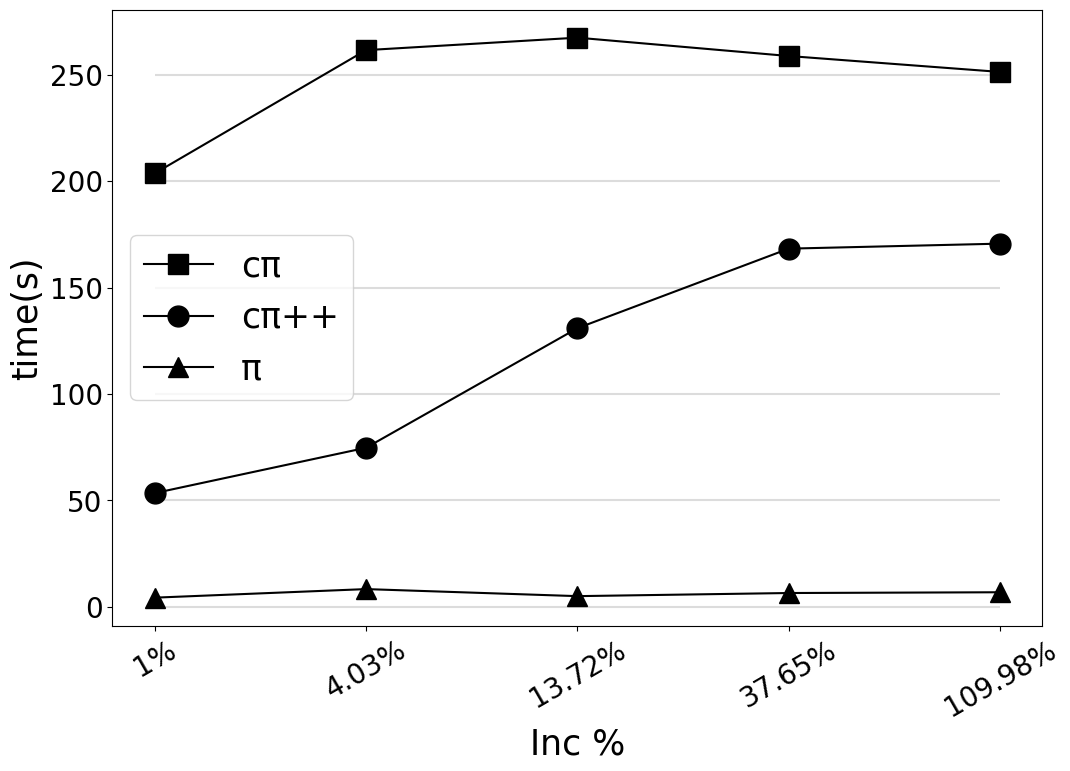

In [ ]:
# Step 3: Plotting
plt.figure(figsize=(12, 8))

plt.hlines(y=[range(0,int(agg_df['cpi_repair_total_time'].max())+50,50)], xmin=0, xmax=4, colors='#DCDCDC', linestyles='-')
# Plot each of the three variables
plt.plot(agg_df['Inc%'], agg_df['cpi_repair_total_time'], label='cπ', marker='s', color="black", markersize=15)
plt.plot(agg_df['Inc%'], agg_df['cpi_repair++_total_time'], label='cπ++', marker='o', color="black", markersize=15)
plt.plot(agg_df['Inc%'], agg_df['pi_repair_total_time'], label='π', marker='^', color="black", markersize=15)

plt.xticks(rotation=30, horizontalalignment="center", fontsize=20)
plt.yticks(size=20)
# Adding plot title and labels

plt.xlabel('Inc %', fontsize= 25)
plt.ylabel('time(s)', fontsize= 25)

# Add a legend to explain which line is which
plt.legend(fontsize= 25)

# Show the plot
plt.show()

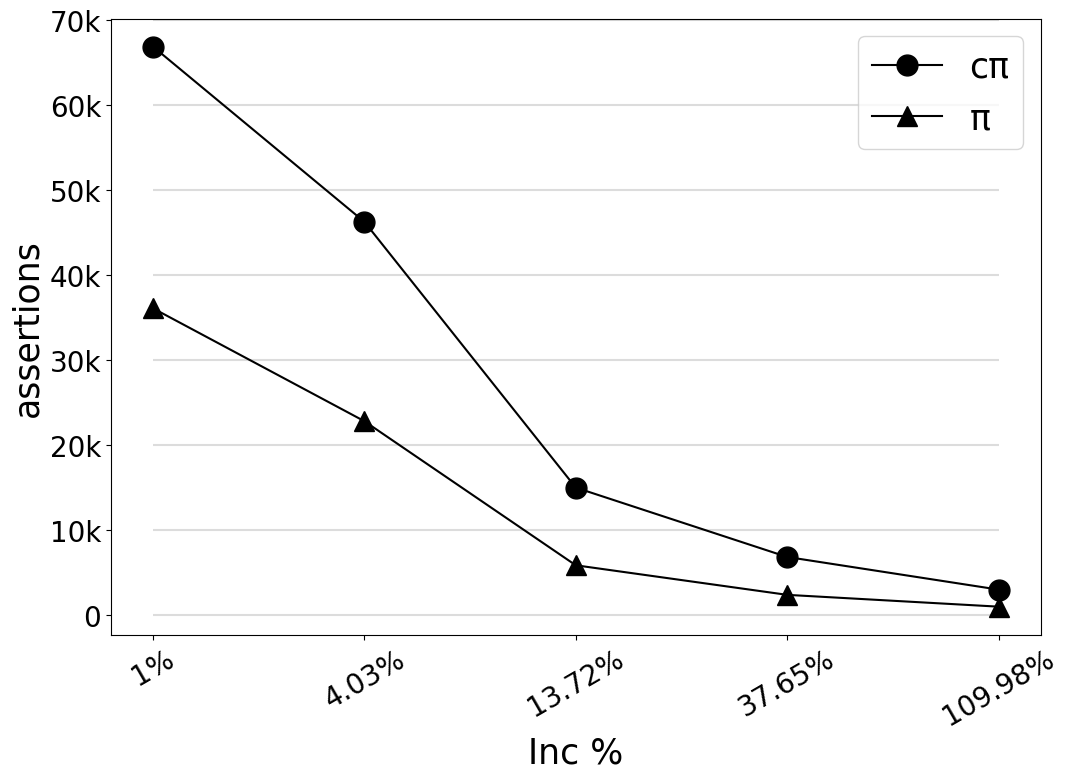

In [ ]:
plt.figure(figsize=(12, 8))

plt.hlines(y=[range(0,max(agg_df['pi_repair_size'].max(),agg_df['cpi_repair++_size'].max())+10000,10000)], xmin=0, xmax=4, colors='#DCDCDC', linestyles='-')

plt.plot(agg_df['Inc%'], agg_df['cpi_repair++_size'], label='cπ', marker='o', color="black", markersize=15)
plt.plot(agg_df['Inc%'], agg_df['pi_repair_size'], label='π', marker='^', color="black", markersize=15)

plt.xticks(rotation=30, horizontalalignment="center", fontsize=20)
plt.yticks(fontsize=20)
# Adding plot title and labels

plt.xlabel('Inc %', fontsize= 25)
plt.ylabel('assertions', fontsize= 25)

# Add a legend to explain which line is which
plt.legend(fontsize= 25)

# Apply the formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# Show the plot
plt.show()

# Proportion of time spent in each step results

In [ ]:
#df = pd.read_csv("/content/u1_proportion_time_results.csv", sep=";")
df = pd.read_csv('u0.5_pos_results.csv', sep=';')

In [ ]:
#persent = {"University0_p_0.000005.db":"1%", "University0_p_0.000006.db": "1.57%", "University0_p_0.00001.db":"4.03%", "University0_p_0.00005.db": "13.72%", "University0_p_0.00015.db":"37.65%", "University0_p_0.0005.db":"109.98%"}

persent = {"university0.5_p_0.000005.db":1.21, "university0.5_p_0.00001.db":4.23, "university0.5_p_0.00005.db":13.79, "university0.5_p_0.0005.db":36.54, "university0.5_p_0.001.db":82.49}

df["Inc%"] = [persent[x] for x in df['ABOX']]

In [ ]:
df_cpi = df[["Inc%","cl_ABox_time","Conflicts_time","all_supports_time","cpi_repair_time"]]
df_cpi_plus = df[["Inc%","cl-ABox_time","Conflicts_time","pi_repair_time","cl_pi_repair_time","supports_time","cpi_repair++_time"]]

In [ ]:
df_cpi = df_cpi.groupby('Inc%').max().reset_index()
df_cpi_plus = df_cpi_plus.groupby('Inc%').max().reset_index()

In [ ]:
df_cpi_plus = df_cpi_plus.rename(columns={"Conflicts_time": "conflicts","pi_repair_time": "π", "cl-ABox_time":"closure", "cl_pi_repair_time":"cl(π)", "supports_time":"supports", "cpi_repair++_time":"cπ"})
df_cpi = df_cpi.rename(columns={"cl_ABox_time": "closure", "Conflicts_time": "conflicts","all_supports_time": "supports", "cpi_repair_time":"cπ"})

In [ ]:
df_cpi['total'] = df_cpi['closure'] + df_cpi['conflicts'] + df_cpi['supports'] + df_cpi['cπ']
df_cpi_plus['total'] = df_cpi_plus['closure'] + df_cpi_plus['conflicts'] + df_cpi_plus['π'] + df_cpi_plus['cl(π)'] + df_cpi_plus['supports'] + df_cpi_plus['cπ']

In [ ]:
df_cpi['closure'] = (df_cpi['closure'] * 100) / df_cpi['total']
df_cpi['conflicts'] = (df_cpi['conflicts'] * 100) / df_cpi['total']
df_cpi['supports'] = (df_cpi['supports'] * 100) / df_cpi['total']
df_cpi['cπ'] = (df_cpi['cπ'] * 100) / df_cpi['total']

In [ ]:
for column in df_cpi_plus.columns:
  if column == "Inc%" : continue
  df_cpi_plus[column] = (df_cpi_plus[column] * 100) / df_cpi_plus['total']

In [ ]:
df_cpi["Inc%"] = [str(x)+"%" for x in df_cpi["Inc%"]]
df_cpi_plus["Inc%"] = [str(x)+"%" for x in df_cpi_plus["Inc%"]]

In [ ]:
df_cpi_plus = df_cpi_plus.drop(columns=['total'])

<Figure size 1800x1200 with 0 Axes>

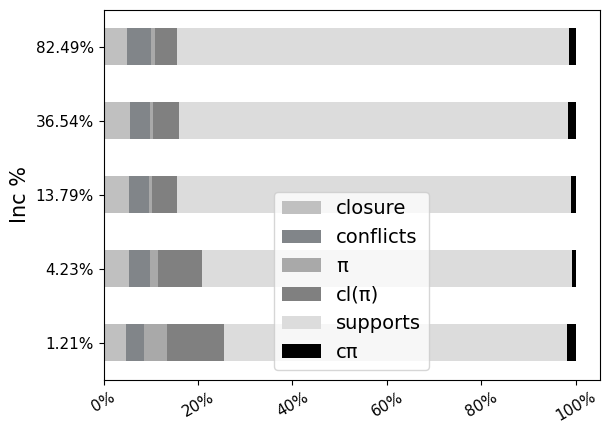

In [ ]:
from ctypes import alignment
import matplotlib.ticker as mtick

plt.figure(figsize=(18, 12))

ax = df_cpi_plus.plot(x='Inc%', kind='barh', color=["#C0C0C0", "#818589", "#A9A9A9", "#808080", "#DCDCDC", "black"],  stacked=True)

plt.xticks(ticks=[0,20,40,60,80,100], rotation=30, horizontalalignment="center", fontsize=11)
plt.yticks(fontsize=11)

# Adding plot title and labels
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

#plt.xlabel('proportion of time', fontsize= 15)
plt.ylabel('Inc %', fontsize= 15)

# Add a legend to explain which line is which
plt.legend(fontsize= 14)

# Show the plot
plt.show()

In [ ]:
df_cpi = df_cpi.drop(columns=['total'])

<Figure size 1800x1200 with 0 Axes>

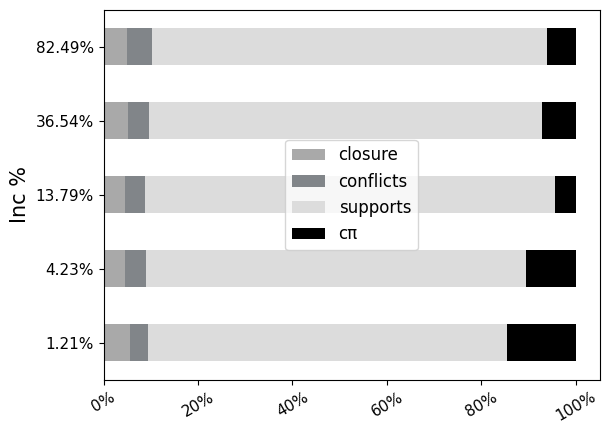

In [ ]:
plt.figure(figsize=(18, 12))

ax = df_cpi.plot(x='Inc%', kind='barh', color=["#A9A9A9","#818589","#DCDCDC","black"],  stacked=True)

plt.xticks(ticks=[0,20,40,60,80,100], rotation=30, horizontalalignment="center",fontsize=11)
plt.yticks(fontsize=11)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
# Adding plot title and labels

#plt.xlabel('time(s)', fontsize= 15)
plt.ylabel('Inc %', fontsize= 15)

# Add a legend to explain which line is which
plt.legend(fontsize= 12)

# Show the plot
plt.show()

# POS analysis

In [ ]:
df_pos = pd.read_csv('u1_pos_results.csv', sep=';')

In [ ]:
df_pos["POS_size"] = [int(x.split("_")[0][3:]) for x in df_pos["POS"]]
df_pos["POS_density"] = [float(x.split("_")[2]) for x in df_pos["POS"]]

In [ ]:
df_pos = df_pos.drop(columns=["ABOX", "TBOX", "POS", "ABox_load_time", "Conflicts_size", "Conflicts_time", "pi_repair_time", "cl-ABox_time", "cpi_repair++_time"])

In [ ]:
idx = df_pos.groupby('POS_density')["only cpi-repair"].idxmax()
idx2 = df_pos.groupby('POS_size')["only cpi-repair"].idxmax()
agg_df_density = df_pos.loc[idx].reset_index()
agg_df_size = df_pos.loc[idx2].reset_index()

In [ ]:
agg_df_density = agg_df_density.drop(index=9)

In [ ]:
df_plt_density = agg_df_density[['POS_density', 'pi_repair_size', 'cl_pi_repair_size', 'only cpi-repair']]#, 'out'
df_plt_size = agg_df_size[['POS_size', 'pi_repair_size', 'cl_pi_repair_size', 'only cpi-repair']]#, 'out'
df_plt_density = df_plt_density.rename(columns={"pi_repair_size": "π", "cl_pi_repair_size": "cl(π)","only cpi-repair": "only cπ"})
df_plt_size = df_plt_size.rename(columns={"pi_repair_size": "π", "cl_pi_repair_size": "cl(π)","only cpi-repair": "only cπ"})

<Figure size 1600x1200 with 0 Axes>

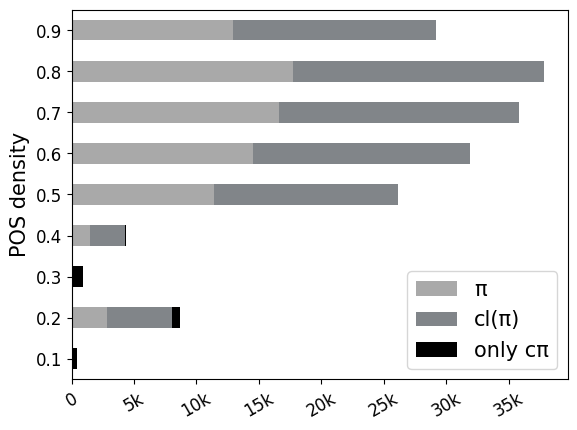

In [ ]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16, 12))

ax = df_plt_density.plot(x='POS_density', kind='barh', color=["#A9A9A9", "#818589","black","#DCDCDC"],  stacked=True)

plt.xticks(rotation=30, horizontalalignment="center", fontsize=12)
plt.yticks(fontsize=12)
# Adding plot title and labels
#plt.title('Repair size vs. POS density', fontsize= 20)
plt.ylabel('POS density', fontsize= 15)
#plt.xlabel('assertions', fontsize= 15)

# Apply the formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
#ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend to explain which line is which
plt.legend(fontsize= 15)

# Show the plot
plt.show()

In [ ]:
#df_plt_size = df_plt_size.drop(index=106)

<Figure size 1600x1200 with 0 Axes>

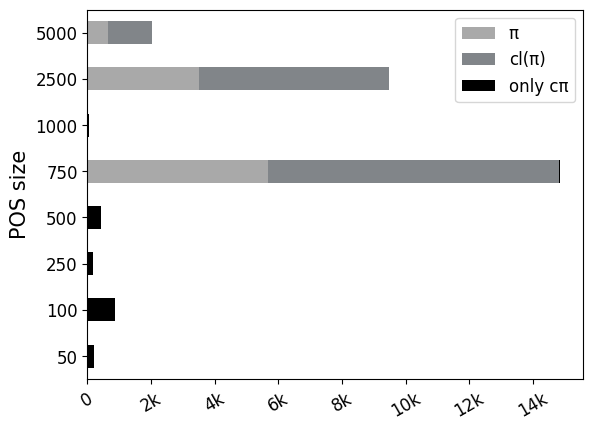

In [ ]:
plt.figure(figsize=(16, 12))

ax = df_plt_size.plot(x='POS_size', kind='barh', color=["#A9A9A9", "#818589","black","#DCDCDC"],  stacked=True)

plt.xticks(rotation=30, horizontalalignment="center", fontsize=12)
plt.yticks(fontsize=12)
# Adding plot title and labels
#plt.title('Repair size vs. POS density', fontsize= 20)
plt.ylabel('POS size', fontsize= 15)
#plt.xlabel('assertions', fontsize= 15)

# Apply the formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
#ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend to explain which line is which
plt.legend(fontsize= 12)

# Show the plot
plt.show()

Consider only the rows where "only cpi" is greater than 0

In [ ]:
df_pos = pd.read_csv('u1_pos_results_only_cpi.csv', sep=';')

In [ ]:
df_pos["POS_size"] = [int(x.split("_")[0][3:]) for x in df_pos["POS"]]
df_pos["POS_density"] = [float(x.split("_")[2]) for x in df_pos["POS"]]

In [ ]:
df_pos = df_pos.drop(columns=["ABOX", "TBOX", "POS", "ABox_load_time", "Conflicts_size", "Conflicts_time", "pi_repair_time", "cl-ABox_time", "cpi_repair++_time"])

In [ ]:
df_pos = df_pos.rename(columns={"pi_repair_size": "π", "cl_pi_repair_size": "cl(π)","only cpi-repair": "only cπ"})

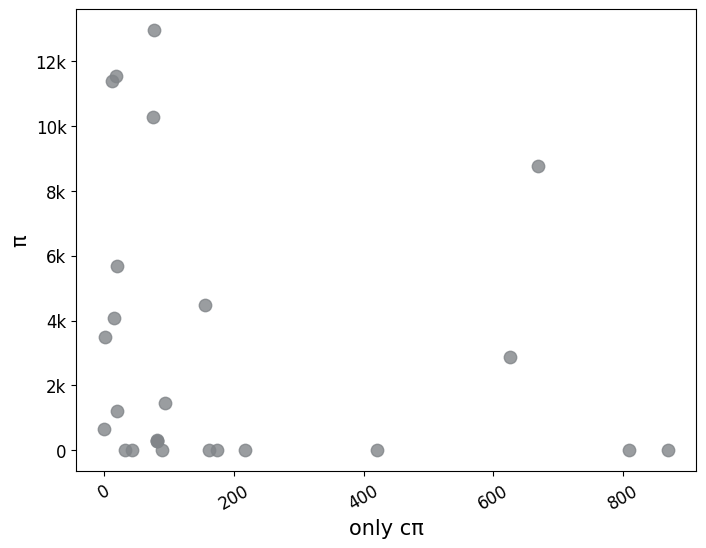

In [ ]:
# @title only cpi_repair vs pi_repair_size
plt.figure(figsize=(8, 6))

#plt.hlines(y=[range(0,int(df_pos['π'].max())+1000,1000)], xmin=0, xmax=900, colors='#DCDCDC', linestyles='dotted')

plt.scatter(df_pos['only cπ'], df_pos['π'], s=80, alpha=.8, color="#818589")

plt.xticks(rotation=30, horizontalalignment="center", fontsize=12)
plt.yticks(fontsize=12)

plt.ylabel('π', fontsize= 15)
plt.xlabel('only cπ', fontsize= 15)

#df_pos.plot(kind='scatter', x='only cπ', y='π', s=80, alpha=.5, color="#818589", figsize=(8,6))
#plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
